# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. 

## Table of Contents

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)
 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
# loading necessary Libraries  
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

## Exploring Data

a.Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# Load file
df = pd.read_csv('ab_data.csv')
#Have a quick look on first 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


 **b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# Identify no. of rows in the dataset
no_rows = len(df.index)
print('The number of rows in the dataset is {}.'.format(no_rows))

The number of rows in the dataset is 294478.


**c.** The number of unique users in the dataset.

In [4]:
# Identify unique users
print('The number of unique users in the dataset is ',df['user_id'].nunique())

The number of unique users in the dataset is  290584


**d.** The proportion of users converted.

In [5]:
# Use value counts to Check proportion of users converted
print('The Proportion of users converted is',df['converted'].mean())

The Proportion of users converted is 0.119659193556


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# Defining a new variable with group and landing page
df_group = df[['group', 'landing_page']] 
df_group.head(2)

,group,landing_page
0,control,old_page
1,control,old_page


In [7]:
# Filtering ['group'] , where ['group'] = 'treatment' & ['landing page'] != new_page & vice versa.
no_match_filter = (df_group['group'] == 'treatment') & (df_group['landing_page'] == 'old_page') | (df_group['group'] == 'control') & (df_group['landing_page'] == 'new_page') 

In [8]:
# Printing results for filter
df.loc[no_match_filter, ['group', 'landing_page']]

,group,landing_page
22,control,new_page
240,control,new_page
308,treatment,old_page
327,treatment,old_page
357,treatment,old_page
490,control,new_page
685,treatment,old_page
713,treatment,old_page
776,treatment,old_page
846,control,new_page


In [9]:
# Create the previous data as 'df_groupfilter' dataframe 
df_groupfilter = pd.DataFrame(df.loc[no_match_filter, ['group', 'landing_page']])

In [10]:
# Assure grouping 
df_groupfilter.head(5)

,group,landing_page
22,control,new_page
240,control,new_page
308,treatment,old_page
327,treatment,old_page
357,treatment,old_page


In [11]:
# Identifying no. of times when the "group" is treatment but "landing_page" is not a new_page
df_groupfilter.count()

group           3893
landing_page    3893
dtype: int64

In [12]:
print('The number of times when the "group" is treatment but \'landing_page\' is not a \'new_page\' and vice versa is 3983')

The number of times when the "group" is treatment but 'landing_page' is not a 'new_page' and vice versa is 3983


Another way to identify The number of times when the "group" is treatment but "landing_page" is not a new_page

In [13]:
no_match_len=df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')").shape[0] 
print('The Number of times where the "group" is treatment but "landing_page" is not a new_page is',no_match_len)

The Number of times where the "group" is treatment but "landing_page" is not a new_page is 3893


**f.** Do any of the rows have missing values?

In [14]:
# Check rows with Nans
nan_values = df[df.isna().any(axis=1)]
print ('nan_values across rows =', nan_values)

nan_values across rows = Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

### Creating a new DataFrame to work with the correct match

In [15]:
# filter df with desired match, where control with old_page and treatment with new page and store the result in a new dataframe df2
df2 = df[(df.group == 'control') & (df.landing_page == 'old_page') | (df.group == 'treatment') & (df.landing_page == 'new_page')]

In [17]:
# Checking new dataframe df2
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [18]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [19]:
print('Total unique user_ids :',df2['user_id'].nunique())

Total unique user_ids : 290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [20]:
# Defining a variable for userid duplicate
user_duplicate = df2[df2.duplicated('user_id')]
user_duplicate

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [21]:
df2.groupby('user_id').get_group(773192)

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [22]:
# Check types pf df2
df2.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [23]:
# Converting timestramp from object to datetime.
df2['timestamp'] = pd.to_datetime(df['timestamp'])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
# Check timestamp converted to date time
df2.dtypes

user_id                  int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
dtype: object

In [25]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
# here we will remove timestamp '2017-01-09' which is less than '2017-01-14'
# Write date 2017-01-09 between quotes as '2017-01-09', to avoid; invalid token error
df2 = df2.loc [~ ((df2 ['user_id']== 773192) & (df ['timestamp'] <= '2017-01-14'))]

In [27]:
# Define a variable 'exist_user' of a filter user_id == 773192 to confirm dropping duplicate user of timestamp == '2017-01-09' 
exist_user = df2.loc[df['user_id'] == 773192]
exist_user 

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?

In [29]:
print('The probability of Overall Conversions, \'Success Rate\',  regardless of the page they received is {}'.format(df2['converted'].mean()))

The probability of Overall Conversions, 'Success Rate',  regardless of the page they received is 0.11959708724499628


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [30]:
c_control = df2[df2['landing_page'] == 'old_page']['converted'].mean()
print('The probability of converting in the conrol group \'Control Conversion rate\' is {}'.format(c_control))

The probability of converting in the conrol group 'Control Conversion rate' is 0.1203863045004612


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [31]:
c_treatment = df2[df2['landing_page'] == 'new_page']['converted'].mean()
print('The probability of converting in the treatment group \'Treatment Conversion rate\' is {}'.format(c_treatment))

The probability of converting in the treatment group 'Treatment Conversion rate' is 0.11880806551510564


- Calculating the actual difference (obs_diff) between the conversion rates for the two groups.

In [32]:
# Calculating the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = c_control - c_treatment
print('The actual difference (obs_diff) between Conversion rates for the two groups is {}'.format(obs_diff))

The actual difference (obs_diff) between Conversion rates for the two groups is 0.0015782389853555567


**d.** What is the probability that an individual received the new page?

In [33]:
recv_new = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
print('The probability that an individual received the new page =', recv_new )

The probability that an individual received the new page = 0.5000619442226688


In [34]:
recv_old = df2.query('landing_page == "old_page"').shape[0]/df2.shape[0]
print('The probability that an individual received the old page =', recv_old )

The probability that an individual received the old page = 0.4999380557773312


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

**Summarized Results**

a) The probability of Total conversions, regardless the recieved page : 0.11959708724499628

b) The probability of conversion when individual was in the control group : 0.1203863045004612

c) The probability of conversion when individual was in the treatment group : 0.11880806551510564

d) The probability of an individual receiving a new page : 0.5000619442226688

e) The probability that an individual receiving the old page : 0.4999380557773312

From all the above, The converted probability (or rate) for the old page recieved by the Control group is slightly higher than that of the new page revieved by the treatment group. 
Taking into cosideration, Conversions resulted from the old page is almost the same as that of the new page.

Therefor Sucess Rate is not affected by either the page is the old or the new one and the new treatment  group users don't lead to more conversions .

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  

### The four steps of hypothesis testing: 
     Step 1 : Stating the Hypothesis.
     Step 2: Set the criteria for a decision. 
     Step 3: Compute the test statistic.
     Step 4: Make a decision. 


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

### Step 1 : Stating the Hypothesis

**$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>


### Step 2 : Set the criteria for a decision
To set the criteria for a decision, we state the level of significance for a test. Level of significance, refers to a criterion of judgment upon which a decision is made regarding the value stated in a null hypothesis. The likelihood or level of significance (\alpha ) is typically set at 5% in behavioral research studies. 

### Step 3: Compute the test statistic.

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [35]:
p_new = df2['converted'].mean()
print('The conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis =',p_new)

The conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis = 0.119597087245


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [36]:
p_old = p_new
print('The conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis =',p_old)

The conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis = 0.119597087245


**c.** What is $n_{new}$, the number of individuals in the treatment group? 

In [37]:
# Knowing that The treatment group users are shown the new page.
n_new = df2.query("landing_page == 'new_page'").shape[0]
print('The number of individuals in the treatment group \'𝑛𝑛𝑒𝑤\' =',n_new)

The number of individuals in the treatment group '𝑛𝑛𝑒𝑤' = 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [38]:
# Knowing that The Control group users are shown the old page.
n_old = df2.query("landing_page == 'old_page'").shape[0]
print('The number of individuals in the Control group \'𝑛𝑜𝑙𝑑 \' =',n_old)

The number of individuals in the Control group '𝑛𝑜𝑙𝑑 ' = 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [39]:
# Simulate a Sample for the treatment Group-
new_page_converted = np.random.binomial(1, p_new, n_new).mean()
print ('Conversion rate for p_new under the null, "new_page_converted" = {}'.format(new_page_converted))

Conversion rate for p_new under the null, "new_page_converted" = 0.11944807652604776


**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [42]:
# Simulate a Sample for the control Group
# np.random;binomial(n, p, size)
old_page_converted = np.random.binomial(1, p_old, n_old).mean()
print ('Conversion rate for p_old under the null, "old_page_converted" = {}'.format(old_page_converted))

Conversion rate for p_old under the null, "old_page_converted" = 0.11993199058331154


**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [43]:
#re-calculate p_new,p_old and do substraction
mean_diff = (new_page_converted - old_page_converted).mean()
mean_diff

-0.00048391405726377901


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [44]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(p_diff)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


(array([   16.,    92.,   503.,  1590.,  2704.,  2784.,  1634.,   567.,
          100.,    10.]),
 array([ -4.60655845e-03,  -3.69046786e-03,  -2.77437727e-03,
         -1.85828668e-03,  -9.42196091e-04,  -2.61055015e-05,
          8.89985088e-04,   1.80607568e-03,   2.72216627e-03,
          3.63825685e-03,   4.55434744e-03]),
 <a list of 10 Patch objects>)

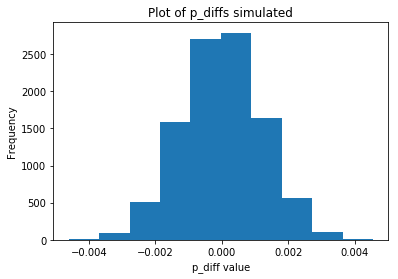

In [45]:
plt.xlabel('p_diff value')
plt.ylabel('Frequency')
plt.title('Plot of p_diffs simulated');
plt.hist(p_diffs)

Yes, The distribution was expected to be normal by the Central Limit Theorem, stating that With a large enough sample size the sampling distribution of the mean will be normally distributed.

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [46]:
org_p_diff = df[df['landing_page'] == 'new_page']['converted'].mean() -  df[df['landing_page'] == 'old_page']['converted'].mean()
print('org_p_diff from ab_data.csv = ',org_p_diff)

org_p_diff from ab_data.csv =  -0.00163679459926


In [47]:
p_diffs = np.array(p_diffs)
p_diff_prop = (org_p_diff < p_diffs).mean()
print('proportion of p_diffs greater than p_diffs from ab_data.csv = ',p_diff_prop)

proportion of p_diffs greater than p_diffs from ab_data.csv =  0.9112


### Step 4: Make  a decision.

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

This value is the pvalue in the scientific studies.

If the p-value were under 0.05, indicating a very low probability of assuming the null hypothesis to be true and accordingly we would go for the alternative hypothesis where there are better conversion rates for the new page.

Here the p-value is above 0.05, which means we do not have evidence to reject the null hypothesis ( Pnew=Pold ). 
Concluding that the probability of statistics tested, In this case suggests that we are looking at a null where there is no difference in conversion based on the page, which means the conversions for each page are the same.
and that new page does not have better conversion rates than the old one.

**So we fail to reject the null and stay with the null hypothesis as our decsion.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [48]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = sum(df2.query("landing_page == 'old_page'")['converted'])

# number of conversions with the new_page
convert_new = convert_new = sum(df2.query("landing_page == 'new_page'")['converted'])

# number of individuals who were shown the old_page
n_old = len(df2.query("landing_page == 'old_page'"))

# number of individuals who received new_page
n_new = len(df2.query("landing_page == 'new_page'"))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [49]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print(z_score, p_value)


1.31092419842 0.189883374482


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

In [50]:
from scipy.stats import norm
# significant of z-score
print(norm.cdf(z_score))

# Assuming a 95% confidence level, for our single-sides test we calculate: 
print(norm.ppf(1-(0.05)))

0.905058312759
1.64485362695


The z-score means that the difference between our test statistic (conversion rates) and the null hypothesis is 1.31 standard deviations above the mean. 

The p-value here is 0.1899 hence, this is above alpha of 0.05. 
We find that the z-score of 1.3109 is less than the critical value of 1.6448536  which means we can't reject the null hypothesis.
we find that old page conversions are slightly better than new page conversions. Eventhough the values are different from findings in parts j. and k but it suggests there is no significant difference between old page and new page conversions. Therefore Ztest aslo suggests that we would fail to reject the null and supports our decision.  **

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since each row in the df2 data is either a conversion or no conversion, , So its a Logistic Regression limiting prediciton into only two possible outomes.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [53]:
df2['intercept'] = 1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [54]:
import statsmodels.api as sm
import scipy.stats as stats
logit = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [55]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:               8.077e-06
Time:                        11:43:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>**p-value is 0.190 .
The p-value here suggests that that new page is not statistically significant as 0.19 > tyoe 1 error rate(0.05) . 

In this section it was a two sided test and in Part II it was a one sided test

Hypothesis in Part II :

$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$**

Hypothesis in Part III :

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0

$H_{1}$ : $p_{new}$ - $p_{old}$ != 0




**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The p-value for ab_page is 0.190 here, The p-value here suggests that that new page is not statistically significant as 0.19 > 0.05. 
This model is attempting to predict whether a user will convert or not depending on their page.

The null hypothesis is that when ab_page = 1, converted = 0; the alternative hypothesis is that when ab_page = 1, converted = 1.**

**Apparently, it is clear that the treatment/control pages don't have this big impact on whether a user converts or not. Hence, its defintely a good idea to look for other factors  that may influence conversion rates  and may lead to more cnversions.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [56]:
# Read the countries.csv
countries_df = pd.read_csv('./countries.csv')

In [57]:
# Join countries_df with the df2 dataframe
df2 = df2.set_index('user_id').join(countries_df.set_index('user_id'))
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [58]:
# Create the necessary dummy variables
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [59]:
# Fit your model, and summarize the results
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:               2.323e-05
Time:                        12:21:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

>**According to the p-values above, it also does not appear that country has a significant impact on conversions (Success Rates), Therefor we fail to reject the null.
Hence, We would reject the alternative hypothesis.
These results are based on given dataset. There may be limitations due to incorrect data or missing columns etc.**

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0